# This is the how you can pull data from the API

In [128]:
import datetime as dt
import io
import json
import jsbeautifier
import matplotlib.pyplot as plt
import os
import pandas as pd
from pprintjson import pprintjson
import requests
from runeq import Config, stream
from scipy import stats
import yaml
from IPython.display import JSON
from IPython.core import display as ICD

In [113]:
def run_test_requests(params: dict, headers, endpoint, field_name, env='staging', extra=True):
    """
    Run a full suite of tests.
    params
        params for the request
    headers:
        client / user credentials
    endpoint:
        name of endpoint that you are querying from e.g. band_power, probability_symptom
    field_name
        name of the measurement e.g. power, probability
    env
        staging, production, or local
    extra
        runs tests for extra querying expressions e.g. first, last, mean, median
    """
    
    if env=='local':
        json_url = f'http://localhost:8080/v1/{endpoint}.csv'
        json_url = f'http://localhost:8080/v1/{endpoint}.json'

    elif env=='staging':
        json_url = f'https://stream-staging.runelabs.io/v1/{endpoint}.json'
        csv_url = f'https://stream-staging.runelabs.io/v1/{endpoint}.csv'

    elif env=='prod':
        json_url = f'https://stream.runelabs.io/v1/{endpoint}.json'
        csv_url = f'https://stream.runelabs.io/v1/{endpoint}.csv'
    else:
        raise ValueError('Unknown envinrontment')

    json_params = params
    availability_params = json_params | {'expression': f'availability({field_name})'}
    response = requests.get(json_url, params=json_params, headers=headers)
    availability_response = requests.get(json_url, params=availability_params, headers=headers)
#     print(f'{field_name}: \n', response.json(), '\n')
    print(field_name, '\n')
    temp_print(response.json())
    print(f'availability({field_name}): \n', availability_response.json(), '\n')

    if extra:
        for exp in ['first', 'mean', 'median', 'last']:
            exp_params = json_params | {'expression': f'{exp}({field_name})'}
            resp = requests.get(json_url, params=exp_params, headers=headers)
            print(f'{exp}({field_name}):\n', resp.json(), '\n')

    csv_params = {k:v for k,v in json_params.items() if k != 'partition_size'}
    availability_csv_params = csv_params | {'expression': f'availability({field_name})'}
    response = requests.get(csv_url, params=csv_params, headers=headers)
    availability_response = requests.get(
        csv_url, params=availability_csv_params, headers=headers)
    print(f'{field_name}: \n', response.text, '\n')
    print(f'availability({field_name}): \n', availability_response.text, '\n')


    if extra:
        for exp in ['first', 'mean', 'median', 'last']:
            exp_params = csv_params | {'expression': f'{exp}({field_name})'}
            resp = requests.get(csv_url, params=exp_params, headers=headers)
            print(f'{exp}({field_name}):\n', resp.text, '\n')

In [86]:
def ppjson(*pre_args, json):
    for arg in pre_args:
        print(arg)
    pprintjson(json)
    print('\n')

In [165]:
def temp_print(*args):
    new_args = []
    for i, arg in enumerate(args):
        if type(arg) == dict:
            arg = jsbeautifier.beautify(json.dumps(arg), options)
        new_args.append(arg)
            
    print(*new_args)

In [154]:
x = {'foo': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0]], 'bar': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}  


In [166]:
y = {
    "result": {
        "cardinality": 4,
        "time": [
            1626126000,
            1626132000,
            1626138000,
            1626144000
        ],
        "x": [
            -0.6352692246437073,
            0.11776725947856903,
            -0.04504386708140373,
            -0.5210418701171875
        ],
        "y": [
            0.2354431450366974,
            1.0323182344436646,
            0.4831390678882599,
            0.6363219618797302
        ],
        "z": [
            -0.7210692763328552,
            0.12341313064098358,
            -0.8650969862937927,
            -0.1139983981847763
        ]
    },
    "success": True
}

In [171]:
temp_print("yada, \n", y, "\n")

yada, 
 {
  "result": {
    "cardinality": 4,
    "time": [1626126000, 1626132000, 1626138000, 1626144000],
    "x": [-0.6352692246437073, 0.11776725947856903, -0.04504386708140373, -0.5210418701171875],
    "y": [0.2354431450366974, 1.0323182344436646, 0.4831390678882599, 0.6363219618797302],
    "z": [-0.7210692763328552, 0.12341313064098358, -0.8650969862937927, -0.1139983981847763]
  },
  "success": true
} 



In [132]:
temp_print({
    "result": {
        "cardinality": 4,
        "time": [
            1626126000,
            1626132000,
            1626138000,
            1626144000
        ],
        "x": [
            -0.6352692246437073,
            0.11776725947856903,
            -0.04504386708140373,
            -0.5210418701171875
        ],
        "y": [
            0.2354431450366974,
            1.0323182344436646,
            0.4831390678882599,
            0.6363219618797302
        ],
        "z": [
            -0.7210692763328552,
            0.12341313064098358,
            -0.8650969862937927,
            -0.1139983981847763
        ]
    },
    "success": True
})

<class 'dict'>
<class 'str'>


## Local

#### v1/event.json

In [94]:
params = {
    'patient_id': 'dangerzonepatient', 
    'start_time': '1567566520',
    'end_time': '1567566530',
    'device_id': 'kp0ArnOK', #fake_percept
    'event': 'clinical'
}
response = requests.get('http://localhost:8080/v1/event.json', params=params)

## Staging

In [8]:
config_path = '/Users/poorv/.rune/api-config-staging.yaml'
with open(config_path) as f:
    credentials = yaml.safe_load(f)
    
headers = {
    'X-Rune-User-Access-Token-Id': credentials['access_token_id'],
    'X-Rune-User-Access-Token-Secret': credentials['access_token_secret']
}

#### v1/band_power

In [114]:
params = {
    'patient_id': '1ce0cbb08eeb4986af2ee7d965e0f505',
    'start_time': '1583357120',
    'end_time': '1583366377',
    'device_id': 'kp0ArnOK'
}

# availability_params = params | {'expression': 'availability(power)'}
# response = requests.get('https://stream-staging.runelabs.io/v1/band_power.json',
#                         params=params, headers=headers)
# availability_response = requests.get('https://stream-staging.runelabs.io/v1/band_power.json', 
#                                      params=availability_params, headers=headers)

# construct_request(params, headers, "https://stream-staging.runelabs.io/v1/band_power.json", "json")
run_test_requests(params, headers, 'band_power', 'power', extra=False)

power 

{
  "result": {
    "cardinality": 830,
    "streams": [{
      "parameters": {
        "algorithm": "medtronic-rcs-3",
        "anatomy": "GPi",
        "band": "9.8hz-15.6hz",
        "channel": "0",
        "sensor": "0-3"
      },
      "power": [4.846, 54.129, 235.775, 527.324, 928.217, 964.244, 881.307, 31394.408, 51219.509, 67004.704, 12.06, 4.546, 6.104, 3.181, 4.538, 4.456, 2.92, 2.954, 1.253, 1253.645, 1304.844, 70.501, 12.931, 5.01, 0.647, 0.792, 0.896, 1.755, 3017.737, 1304.52, 1.547, 2.765, 20.505, 146.029, 375.106, 748.03, 878.016, 841.952, 532.507, 44637.084, 43120.432, 16.545, 8.15, 15.144, 12.022, 17.73, 21.445, 207.739, 1214.208, 2291.902, 46.334, 71.513, 7.494, 6.751, 4.068, 1.771, 0.344, 0.342, 0.868, 1.653, 3.263, 3.412, 7.92, 11.518, 46.788, 202.73, 508.304, 981.337, 1176.227, 1157.199, 15152.239, 24884.495, 32178.043, 19035.044, 30.107, 13.076, 17.086, 14.385, 23.868, 858.83, 1407.012, 969.569, 33.452, 2.791, 4.01, 5.173, 5.412, 5.301, 3.912, 4.719, 5.866

power: 
 timestamp,algorithm,anatomy,band,channel,sensor,power
1583357127.237000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,4.846
1583357127.367000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,54.129
1583357127.526000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,235.775
1583357127.673000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,527.324
1583357127.827000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,928.217
1583357127.981000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,964.244
1583357128.117000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,881.307
1583357128.273000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,31394.408
1583357128.423000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,51219.509
1583357128.583000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,67004.704
1583357128.723000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,12.06
1583357128.871000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,4.546
1583357129.019000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,6.104
1583357129.173000,medtronic-rcs-3,GPi,9.8hz-15.6hz,0,0-3,3.181
1583357129.332000,medtronic-rcs-

#### v1/probability_symptom

In [ ]:
params = {
    'device_id': 'kp0ArnOK',
    'symptom': 'tremor',
    'patient_id': '1ce0cbb08eeb4986af2ee7d965e0f505',
    'start_time': '1586210745',
    'end_time': '1586229747',
    'resolution': '3000',
    'partition_size': '288',
    'timestamp': 'datetime',
    'timezone': '-14400',
    'severity': '*'
}
run_test_requests(params, headers, 'probability_symptom', 'probability')

#### v1/accel

In [93]:
params = {
    'device_id': 'OXWME382',
    'patient_id': 'acd84ff341f54588a0eb6afb1173a2f1',
    'start_time': '1626128333',
    'end_time': '1626147851',
   'resolution': '6000',
}
run_test_requests(params, headers, 'accel', 'gravity')

gravity: 

{
    "result": {
        "cardinality": 4,
        "time": [
            1626126000,
            1626132000,
            1626138000,
            1626144000
        ],
        "x": [
            -0.6352692246437073,
            0.11776725947856903,
            -0.04504386708140373,
            -0.5210418701171875
        ],
        "y": [
            0.2354431450366974,
            1.0323182344436646,
            0.4831390678882599,
            0.6363219618797302
        ],
        "z": [
            -0.7210692763328552,
            0.12341313064098358,
            -0.8650969862937927,
            -0.1139983981847763
        ]
    },
    "success": true
}


availability(gravity): 

{
    "error": {
        "fields": [
            "expression"
        ],
        "message": "invalid value: must be one of: accel, user, gravity, availability(accel), first(accel), last(accel), mean(accel), median(accel), first(user), last(user), mean(user), median(user), first(gravity), last(grav

## Production

In [ ]:
prod_config_path = '/Users/poorv/.rune/api-config-production.yaml'
with open(prod_config_path) as f:
    production_credentials = yaml.safe_load(f)
    
prod_headers = {
    'X-Rune-User-Access-Token-Id': production_credentials['access_token_id'],
    'X-Rune-User-Access-Token-Secret': production_credentials['access_token_secret']
}

#### v1/band_power

In [ ]:
prod_params = {
    'patient_id': '9c2ffb54dcab4d54a3dbd05770c2c1c5',
    'start_time': '1583357120',
    'end_time': '1583366377',
    'device_id': '0uuQAj6X'
}
run_test_requests(prod_params, prod_headers, 'band_power', 'power', extra=False, env="prod")

In [ ]:
prod_params = {
    'device_id': '0uuQAj6X',
    'symptom': 'tremor',
    'patient_id': '9c2ffb54dcab4d54a3dbd05770c2c1c5',
    'start_time': '1586210745',
    'end_time': '1586229747',
    'resolution': '3000',
    'partition_size': '288',
    'timestamp': 'datetime',
    'timezone': '-14400',
    'severity': '*'
}
run_test_requests(prod_params, prod_headers, 'probability_symptom', 'probability', env='prod')

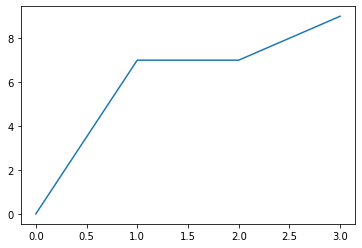

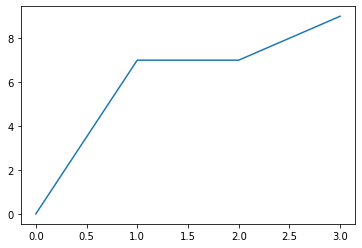

In [127]:
# cell 1
from IPython.display import display

import random as rd
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# cell 2
class Output:
    """
    Helper class
    """
    def __init__(self, name='my-display'):
        self.h = display(display_id=name)
        self.content = ''
        self.mime_type = None
        self.dic_kind = {
            'text': 'text/plain',
            'markdown': 'text/markdown',
            'html': 'text/html',
        }
        
    def display(self):
        self.h.display({'text/plain': ''}, raw=True)
        
    def _build_obj(self, content, kind, append, new_line):
        self.mime_type = self.dic_kind.get(kind)
        if not self.mime_type:
            return content, False
        if append:
            sep = '\n' if new_line else ''
            self.content = self.content + sep + content
        else:
            self.content = content
        return {self.mime_type: self.content}, True
        
    def update(self, content, kind=None, append=False, new_line=True):
        obj, raw = self._build_obj(content, kind, append, new_line)
        self.h.update(obj, raw=raw)


# cell 3
out = Output(name='my-display-2')
out.display()
# ==> output is updated at each h.update() command in cells below

# cell 4
s = ''.join(rd.choices('abcedfghijklmn', k=5))
out.update(s, kind='text', append=False)

# cell 5
a, b = rd.choices(range(10), k=2)
s = f'''\
# Heading one {a}

This is a sample  {b}

* a
* list
'''
out.update(s, kind='markdown', append=True)

# cell 6
a, b = rd.choices(range(10), k=2)
s = f'''\
<h3>My Title {a}</h3>
<p>My paragraph {b}</p>
'''
out.update(s, kind='html')

# cell 7
a, b, c, d = rd.choices(range(10), k=4)
arr = np.array([[a,b,c,d], [d,c,b,a]])
out.update(arr)

# cell 8
a, b, c, d = rd.choices(range(10), k=4)
df = pd.DataFrame(data=[[a,b],[c,d]], columns=['A', 'B'])
out.update(df)

# cell 9
a, b, c, d = rd.choices(range(10), k=4)
df = pd.DataFrame(data=[[a,b],[c,d]], columns=['a', 'b'])
ax = df.plot();
fig = ax.get_figure()
out.update(fig)
plt.close()

# cell 10
fig, ax = plt.subplots()
a,b,c,d = rd.choices(range(10), k=4)
ax.plot([a,b,c,d]);
out.update(fig)
plt.close()

In [126]:

# cell 4
s = ''.join(rd.choices('abcedfghijklmn', k=5))
h.update(s)

# cell 5
a, b, c, d = rd.choices(range(10), k=4)
arr = np.array([[a,b,c,d], [d,c,b,a]])
h.update(arr)

# cell 6
a, b, c, d = rd.choices(range(10), k=4)
df = pd.DataFrame(data=[[a,b],[c,d]], columns=['A', 'B'])
h.update(df)

# cell 7
a, b, c, d = rd.choices(range(10), k=4)
df = pd.DataFrame(data=[[a,b],[c,d]], columns=['a', 'b'])
ax = df.plot();
fig = ax.get_figure()
h.update(fig)
plt.close()

# cell 8
fig, ax = plt.subplots()
a,b,c,d = rd.choices(range(10), k=4)
ax.plot([a,b,c,d]);
h.update(fig)
plt.close()